In [2]:
import os
import yfinance

import pandas as pa
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import ar_select_order

In [3]:
# DOC: Make all the plots bigger
plt.rcParams["figure.figsize"] = [10, 5]

In [4]:
tsla = yfinance.Ticker('TSLA')

In [5]:
tsla_history = tsla.history(start='2000-01-01')
tsla_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2021-04-15,743.099976,743.690002,721.309998,738.849976,27848900,0,0.0
2021-04-16,728.650024,749.409973,724.599976,739.780029,27924000,0,0.0
2021-04-19,719.599976,725.400024,691.799988,714.630005,39686200,0,0.0


<AxesSubplot:xlabel='Date'>

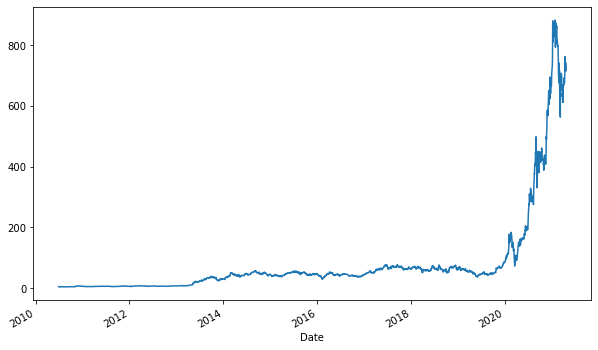

In [6]:
tsla_history['Close'].plot(figsize=(10,6))

In [7]:
tsla_history_close = tsla_history['Close']
tsla_history_close

Date
2010-06-29      4.778000
2010-06-30      4.766000
2010-07-01      4.392000
2010-07-02      3.840000
2010-07-06      3.222000
                 ...    
2021-04-15    738.849976
2021-04-16    739.780029
2021-04-19    714.630005
2021-04-20    718.989990
2021-04-21    740.150024
Name: Close, Length: 2722, dtype: float64

In [8]:
business_day_range = pa.date_range(
    start='2010-06-29', 
    end='2021-04-13', 
    freq='B'
)

In [9]:
business_day_range

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-05', '2010-07-06', '2010-07-07', '2010-07-08',
               '2010-07-09', '2010-07-12',
               ...
               '2021-03-31', '2021-04-01', '2021-04-02', '2021-04-05',
               '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
               '2021-04-12', '2021-04-13'],
              dtype='datetime64[ns]', length=2816, freq='B')

In [10]:
# DOC: Get a value for every business day
tsla_history_close = tsla_history_close.reindex(business_day_range)
tsla_history_close

2010-06-29      4.778000
2010-06-30      4.766000
2010-07-01      4.392000
2010-07-02      3.840000
2010-07-05           NaN
                 ...    
2021-04-07    670.969971
2021-04-08    683.799988
2021-04-09    677.020020
2021-04-12    701.979980
2021-04-13    762.320007
Freq: B, Name: Close, Length: 2816, dtype: float64

In [11]:
# DOC: Interpolate any missing values (shouldn't be alot)
tsla_history_close.fillna(method='ffill', inplace=True)
tsla_history_close

2010-06-29      4.778000
2010-06-30      4.766000
2010-07-01      4.392000
2010-07-02      3.840000
2010-07-05      3.840000
                 ...    
2021-04-07    670.969971
2021-04-08    683.799988
2021-04-09    677.020020
2021-04-12    701.979980
2021-04-13    762.320007
Freq: B, Name: Close, Length: 2816, dtype: float64

In [12]:
tsla_history_close.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-05', '2010-07-06', '2010-07-07', '2010-07-08',
               '2010-07-09', '2010-07-12',
               ...
               '2021-03-31', '2021-04-01', '2021-04-02', '2021-04-05',
               '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
               '2021-04-12', '2021-04-13'],
              dtype='datetime64[ns]', length=2816, freq='B')

In [13]:
tsla.options

('2021-04-23',
 '2021-04-30',
 '2021-05-07',
 '2021-05-14',
 '2021-05-21',
 '2021-05-28',
 '2021-06-18',
 '2021-07-16',
 '2021-09-17',
 '2021-12-17',
 '2022-01-21',
 '2022-03-18',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17')

In [14]:
tsla_option_chain = tsla.option_chain('2021-06-18')

In [15]:
calls = tsla_option_chain.calls
calls.sort_values('lastTradeDate', ascending=False, inplace=True)
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
282,TSLA210618C00850000,2021-04-21 19:26:20,850.0,31.30,31.20,31.60,2.759998,9.670631,245.0,24687,0.578831,False,REGULAR,USD
305,TSLA210618C01050000,2021-04-21 19:26:06,1050.0,7.10,7.05,7.20,0.030000,0.424324,35.0,2376,0.602940,False,REGULAR,USD
292,TSLA210618C00950000,2021-04-21 19:26:05,950.0,14.30,13.80,14.40,0.700000,5.147057,119.0,6972,0.578465,False,REGULAR,USD
277,TSLA210618C00800000,2021-04-21 19:25:48,800.0,46.10,46.10,46.35,4.399998,10.551553,1628.0,29251,0.585301,False,REGULAR,USD
257,TSLA210618C00600000,2021-04-21 19:25:47,600.0,159.49,158.45,159.45,12.940002,8.829752,50.0,12954,0.621037,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,TSLA210618C00145000,2020-07-09 20:54:22,145.0,385.00,0.00,0.00,0.000000,0.000000,2.0,2,0.000010,True,REGULAR,USD
107,TSLA210618C00135000,2020-07-09 20:54:21,135.0,827.75,0.00,0.00,0.000000,0.000000,1.0,5,0.000010,True,REGULAR,USD
101,TSLA210618C00125000,2020-07-09 20:54:20,125.0,406.85,0.00,0.00,0.000000,0.000000,10.0,11,0.000010,True,REGULAR,USD
95,TSLA210618C00115000,2020-07-09 20:54:19,115.0,658.40,0.00,0.00,0.000000,0.000000,1.0,2,0.000010,True,REGULAR,USD


In [16]:
tsla_most_recent_call = calls.iloc[0]
tsla_most_recent_call

contractSymbol       TSLA210618C00850000
lastTradeDate        2021-04-21 19:26:20
strike                             850.0
lastPrice                           31.3
bid                                 31.2
ask                                 31.6
change                          2.759998
percentChange                   9.670631
volume                             245.0
openInterest                       24687
impliedVolatility               0.578831
inTheMoney                         False
contractSize                     REGULAR
currency                             USD
Name: 282, dtype: object

In [53]:
tsla_most_recent_call_bid = tsla_most_recent_call['bid']
tsla_most_recent_call_bid
tsla_most_recent_strike = tsla_most_recent_call['strike']
tsla_most_recent_strike

850.0

In [18]:
mod = ar_select_order(tsla_history_close, maxlag=30, old_names=True)

In [19]:
tsla_model = mod.model
tsla_model_results = tsla_model.fit()
tsla_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2816
Model:                    AutoReg(30)   Log Likelihood               -9237.250
Method:               Conditional MLE   S.D. of innovations              6.664
Date:                Wed, 21 Apr 2021   AIC                              3.816
Time:                        15:41:53   BIC                              3.884
Sample:                    08-10-2010   HQIC                             3.841
                         - 04-13-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0393      0.145      0.272      0.786      -0.244       0.323
Close.L1       0.9356      0.019     49.280      0.000       0.898       0.973
Close.L2       0.0239      0.026      0.924      0.355      -0.027       0.075
Close.L3       0.1285      0.026      4.951      0.000       0.078       0.179
Close.L4       0.0006      0.026      0.022      0.983      -0.051       0.052
Close.L5      -0.1791      0.026     -6.866      0.000      -0.230      -0.128
Close.L6       0.0810      0.026      3.087      0.002       0.030       0.132
Close.L7      -0.0250      0.026     -0.955      0.339      -0.076       0.026
Close.L8       0.0564      0.026      2.145      0.032       0.005       0.108
Close.L9       0.1464      0.026      5.571      0.000       0.095       0.198
Close.L10     -0.0862      0.026     -3.255      0.001      -0.138      -0.034
Close.L11     -0.0721      0.027     -2.718      0.007      -0.124      -0.020
Close.L12     -0.0170      0.026     -0.645      0.519      -0.069       0.035
Close.L13     -0.0877      0.026     -3.326      0.001      -0.139      -0.036
Close.L14      0.0949      0.026      3.598      0.000       0.043       0.147
Close.L15      0.0359      0.026      1.357      0.175      -0.016       0.088
Close.L16     -0.0546      0.026     -2.065      0.039      -0.106      -0.003
Close.L17      0.0433      0.026      1.635      0.102      -0.009       0.095
Close.L18      0.0490      0.026      1.854      0.064      -0.003       0.101
Close.L19     -0.1272      0.027     -4.786      0.000      -0.179      -0.075
Close.L20  -3.261e-06      0.027     -0.000      1.000      -0.053       0.053
Close.L21      0.0211      0.027      0.777      0.437      -0.032       0.074
Close.L22      0.1031      0.027      3.818      0.000       0.050       0.156
Close.L23      0.0003      0.027      0.012      0.990      -0.053       0.053
Close.L24     -0.1167      0.027     -4.282      0.000      -0.170      -0.063
Close.L25      0.1466      0.027      5.350      0.000       0.093       0.200
Close.L26     -0.0887      0.028     -3.133      0.002      -0.144      -0.033
Close.L27     -0.0817      0.030     -2.732      0.006      -0.140      -0.023
Close.L28      0.0600      0.030      2.033      0.042       0.002       0.118
Close.L29     -0.1261      0.030     -4.253      0.000      -0.184      -0.068
Close.L30      0.1385      0.022      6.441      0.000       0.096       0.181
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0687           -0.0000j            1.0687           -0.5000
AR.2            -1.0579           -0.2186j            1.0803           -0.4676
AR.3            -1.0579           +0.2186j            1.0803            0.4676
AR

In [80]:
# DOC: Statistical moments of underlying
tsla_history_close.loc['2020-04-01':].describe()

count    270.000000
mean     453.062569
std      230.649682
min       90.893997
25%      249.592995
50%      423.035004
75%      661.750000
max      883.090027
Name: Close, dtype: float64

In [21]:
dir(tsla_model_results)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ar_lags',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_df_model',
 '_get_robustcov_results',
 '_hold_back',
 '_lag_repr',
 '_max_lag',
 '_n_totobs',
 '_nobs',
 '_params',
 '_use_t',
 'aic',
 'ar_lags',
 'arfreq',
 'bic',
 'bse',
 'conf_int',
 'cov_params',
 'cov_params_default',
 'data',
 'df_model',
 'df_resid',
 'diagnostic_summary',
 'f_test',
 'fittedvalues',
 'forecast',
 'fpe',
 'get_prediction',
 'hqic',
 'initialize',
 'llf',
 'load',
 'model',
 'nobs',
 'normalized_cov_params',
 'params',
 'plot_diagnostics',
 'plot_predict',
 'predict',
 'pvalues',
 'remove_data',
 'resid',
 'roots',
 'save',
 'scale',
 'si

In [22]:
tsla_model_results.resid

2010-08-10    -0.078840
2010-08-11    -0.261629
2010-08-12    -0.275487
2010-08-13     0.022285
2010-08-16    -0.039871
                ...    
2021-04-07   -11.613840
2021-04-08     9.784935
2021-04-09    -9.878066
2021-04-12    18.111835
2021-04-13    39.235331
Freq: B, Length: 2786, dtype: float64

In [99]:
def covered_call_strategy(spot_at_expiration, spot_now, premium, 
                          strike):
    """
    Implements a covered call strategy
    
    Parameters
    ----------
    spot_at_expiration: float
        The spot price of the underlying at expiration
    spot_now : float
        The spot price of the underlying now
    premium : float
        The premium received for this option
    strike : float
        Strike price of the call option sold
    
    Return
    ------
    payoff : float
        Payoff of the option
    """
    # DOC: Calculate pure return from underlying
    payoff_underlying = spot_at_expiration - spot_now
    # DOC: Calculate pure return of selling option
    if spot_at_expiration > strike:
        payoff_call = premium - (spot_at_expiration - strike)
    else:
        payoff_call = premium 
    # DOC: Return total payoff
    return payoff_underlying + payoff_call

In [ ]:
# SEC: Begin sampling of errors, estimate model, generate forecast
tsla_forecasts = {}
tsla_payoffs = {}
np.random.seed(100)
for it in range(50):
    error_sample = tsla_model_results.resid.sample(frac=1)
    error_sample.index = tsla_history_close.index[-len(error_sample.index):]
    tsla_new_sample = (tsla_history_close + error_sample).dropna()
    new_tsla_ar_model = ar_select_order(
        tsla_new_sample, 
        maxlag=30, 
        old_names=True
    )
    model = new_tsla_ar_model.model.fit()
    new_forecast = model.predict(start='2021-04-14', end='2021-06-18')
    tsla_forecasts[it] = pa.concat(
        [
            tsla_history_close.loc['2021-03-14':'2021-04-13'], 
            new_forecast
        ], axis=0
    )
    tsla_payoffs[it] = covered_call_strategy(
        spot_at_expiration=new_forecast.loc['2021-06-18'],
        spot_now=tsla_history_close.loc['2021-04-13'],
        premium=tsla_most_recent_call_bid,
        strike=tsla_most_recent_strike
        
    )
    print(it)
    # print(tsla_history_close.tail())
    # print(error_sample.tail())
    # print(tsla_new_sample.head())
    # if it > 10:
    #    break

In [40]:
type(tsla_forecasts)
tsla_forecasts.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [73]:
# DOC: Get all simulations into a DF
all_sims_df = pa.DataFrame(tsla_forecasts)
all_sims_df.loc['2021-06-18'].describe()

count     50.000000
mean     839.625332
std       11.600423
min      809.448706
25%      837.071425
50%      838.123147
75%      838.826457
max      905.033860
Name: 2021-06-18 00:00:00, dtype: float64

<AxesSubplot:>

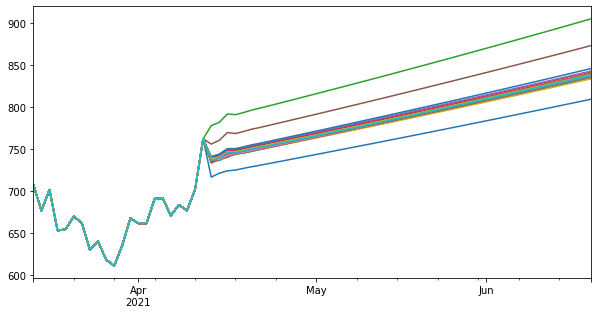

In [72]:
all_sims_df.plot(legend=False)

<AxesSubplot:>

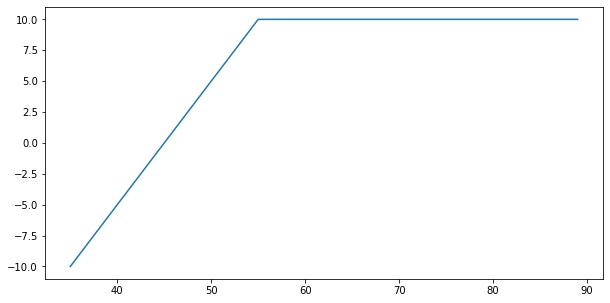

In [102]:
# SEC: Covered call strategy testing
current_price = 50
prices_at_expiration = np.arange(35, 90)
premium = 5
strike = 55
payoffs = pa.Series(prices_at_expiration, index=prices_at_expiration).apply(
    covered_call_strategy, 
    args=(current_price, premium, strike)
)
payoffs.plot()

<AxesSubplot:>

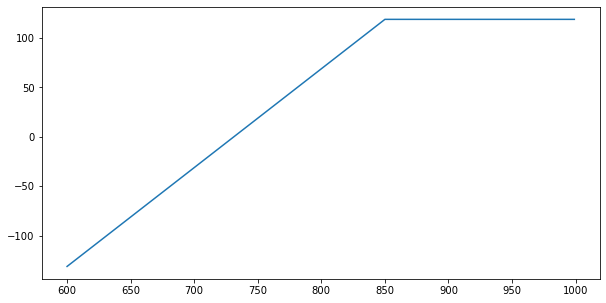

In [103]:
# SEC: Covered call strategy testing (with actual values)
current_price = tsla_history_close.loc['2021-04-13']
prices_at_expiration = np.arange(600, 1000)
premium = tsla_most_recent_call_bid
strike = tsla_most_recent_strike
payoffs = pa.Series(prices_at_expiration, index=prices_at_expiration).apply(
    covered_call_strategy, 
    args=(current_price, premium, strike)
)
payoffs.plot()

In [89]:
cc_payoffs_series = pa.Series(tsla_payoffs)
cc_payoffs_series.describe()

count     11.000000
mean      28.225756
std      251.997700
min     -731.120007
25%      104.654909
50%      107.294120
75%      107.902749
max      108.567122
dtype: float64

<AxesSubplot:>

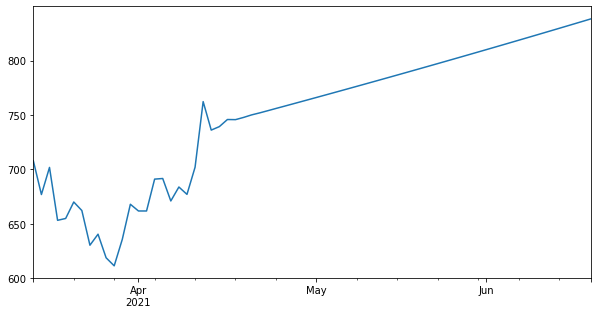

In [93]:
actual_underlying = tsla_forecasts[4]
actual_underlying.plot()

In [95]:
actual_payoff = tsla_payoffs[4]
actual_payoff

107.41496044930705